In [1]:
# 1. 기본 라이브러리 불러오기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
# 2. 사용자 정의 함수 ImageConv(inp, mask) 정의하기
def ImageConv(inp, mask):
    n = mask.shape[0]
    k = np.uint8((n-1)/2)
    h,w = inp.shape
    inp_pad = np.zeros((h+2*k, w+2*k))
    inp_pad[k:h+k, k:w+k] = inp
    out = np.zeros((h+2*k, w+2*k))
    for i in range(k, h+k):
        for j in range(k, w+k):
            temp = inp_pad[i-k:i+k+1, j-k:j+k+1]
            for x in range(0,n):
                for y in range(0,n):
                    out[i,j] += temp[x,y]*mask[x,y]
    out = out[k:h+k, k:w+k]
    return np.uint8(out)

In [4]:
# 3. (numpy) 필터 (mask1~mask3) 생성하기
n = 3 # mask의 너비
mask1 = np.array([[1,2,3], [4,5,6], [7,8,9]])/45

# mask1 = np.array([[1,1,1], [1,5,1], [1,1,1]])/9
# 계수가 1이 넘어가면 255 -> 285 따라서, 반드시 계수의 합은 1이어야 한다.

# mask1 = np.ones((n,n))/9
mask2 = np.array([[1,2,1], [2,4,2], [1,1,1]])/16
mask3 = np.array([[2,3,2], [3,5,3], [2,3,2]])/25

print(mask1)
print(mask2)
print(mask3)
print(out[100,0])

[[0.02222222 0.04444444 0.06666667]
 [0.08888889 0.11111111 0.13333333]
 [0.15555556 0.17777778 0.2       ]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.0625 0.0625]]
[[0.08 0.12 0.08]
 [0.12 0.2  0.12]
 [0.08 0.12 0.08]]


NameError: name 'out' is not defined

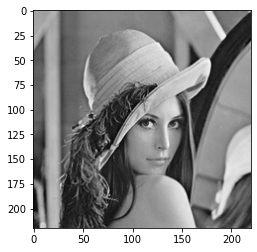

In [14]:
# 4. 'Lenna.png'를 흑백영상(inp)으로 불러오기
inp = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(inp,cmap='gray')
print()

In [15]:
# 5. ImageConv(inp,mask)를 사용하여 결과 출력하기
out1 = ImageConv(inp, mask1)
out2 = ImageConv(inp, mask2)
out3 = ImageConv(inp, mask3)

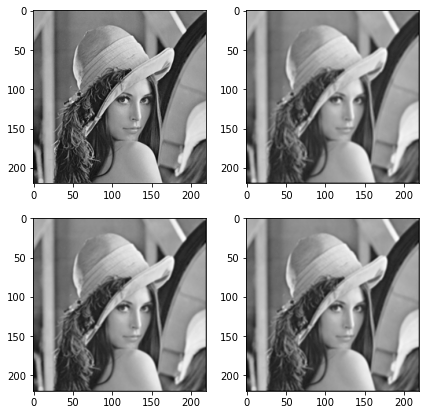

In [20]:
plt.figure(figsize=(7,7)) # 크기 조정
plt.subplot(2,2,1); plt.imshow(inp,cmap='gray')
plt.subplot(2,2,2); plt.imshow(out1,cmap='gray')
plt.subplot(2,2,3); plt.imshow(out2,cmap='gray')
plt.subplot(2,2,4); plt.imshow(out3,cmap='gray')